## DSCI 100 PROJECT PROPOSAL 
- Bryan Park
- add name
- add name
- add name 

## INTRODUCTION 

Coronary artery disease (CAD) is one of the most common types of heart diseases in the world. It is usually caused by plaques building up in the arteries wall and affecting regular heart functions. The buildup of plaque can lead to atherosclerosis, which is the narrowing process of the artery walls. 

The symptoms of CAD include chest pain, discomfort in the arms or shoulder, feeling sick to the stomach, or a cold sweat. As time passes, CAD may lead to heart failure, resulting in a serious condition in which the heart cannot pump blood properly. Many risk factors can increase the chance of developing CAD, including unhealthy eating, lack of physical activity, and smoking tobacco. A family history of heart disease could also increase the risk of getting CAD.

The question we will be addressing is **"How can different factors such as age, gender, resting blood pressure and maximum heart rate contribute in the process of diagnosing a patient of heart disease?"** 

The data set we are using is Cadiovascular_Disease_Dataset published on April 16, 2021 from Lincoln University College. The contributors are Bhanu Prakash Doppala and Debnath Bhattecharyya. The dataset was gathered from a multispecialty hospital in India and it contains 1000 subjects with 12 features. It has statsitics on a patients age, gender, cholesterol leveles, heart rate and their final test results. 




## PRELIMINARY EXPLORATORY DATA ANALYSIS

In [99]:
library(tidyverse)
library(tidymodels)
set.seed(1)


In [100]:
heart_disease <- read_csv("data/disease_dataset.csv")

head(heart_disease)


Rows: 1000 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): patientid, age, gender, chestpain, restingBP, serumcholestrol, fas...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1


In [101]:
heart_disease <- heart_disease |> 
    mutate(test_result = as_factor(target)) |> 
    mutate(test_result = fct_recode(test_result, "Positive" = "1", "Negative" = "0"))

head(heart_disease) 

patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,test_result
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1,Positive
119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0,Negative
119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0,Negative
132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1,Positive
146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1,Positive
148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1,Positive


In [98]:
heart_disease <- heart_disease |> 
    select(age,gender,restingBP,maxheartrate, test_result)

heart_disease_split <- initial_split(heart_disease, prop = 0.75, strata = test_result)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

head(heart_disease_train)

age,gender,restingBP,maxheartrate,test_result
<dbl>,<fct>,<dbl>,<dbl>,<fct>
40,Negative,94,115,Negative
49,Negative,133,202,Negative
52,Negative,127,192,Negative
62,Negative,121,138,Negative
59,Negative,98,117,Negative
65,Negative,200,194,Negative


We will be training our classification model using 75% of our original dataset. Our response variable will be the test_result, which shows wether the patient was positive or negative for any heart disease. The predictors that we will be using are age, gender (0 indicating female and 1 indicating male), resting blood pressure and maximum heart rate. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


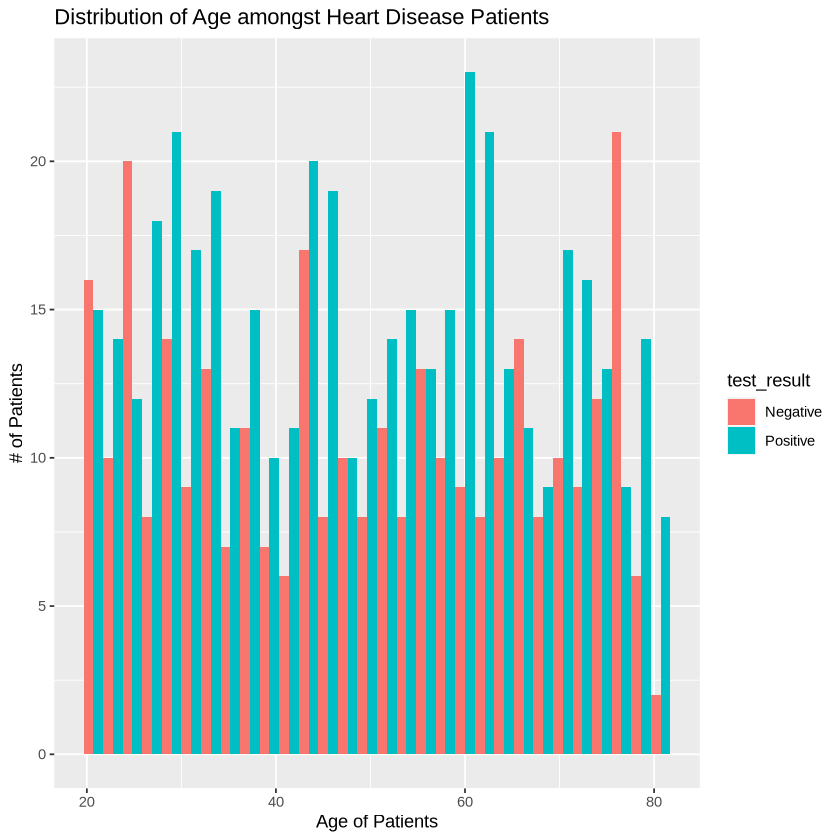

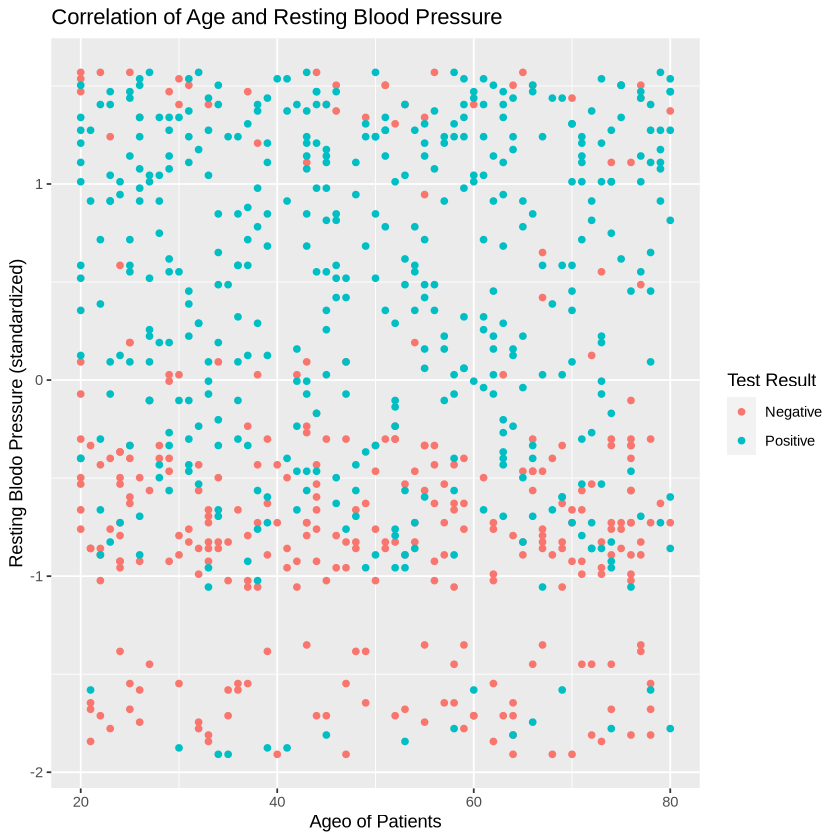

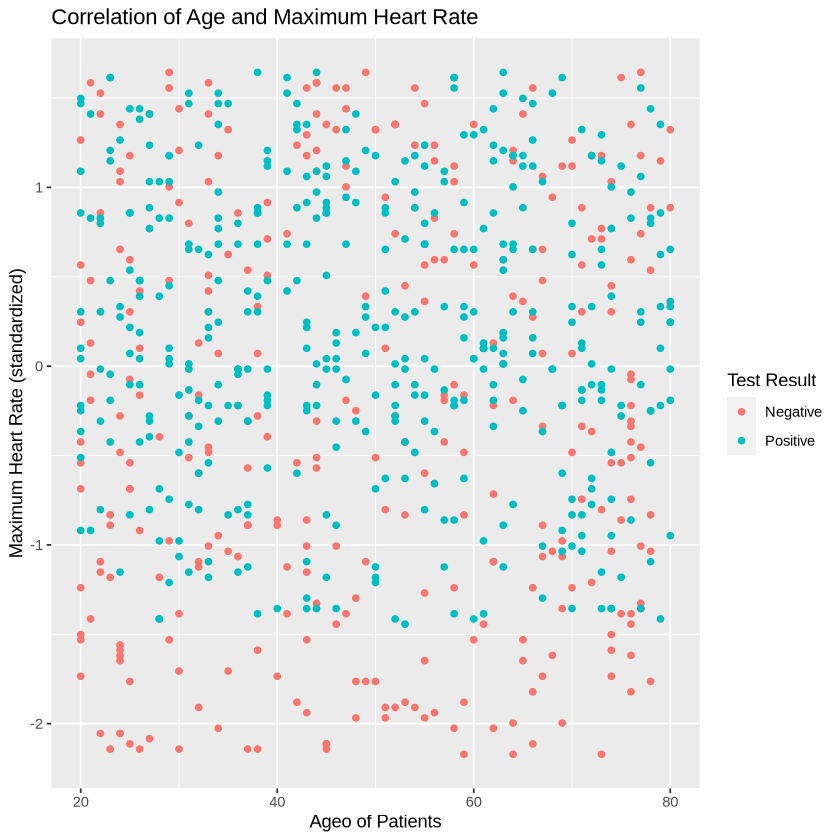

In [104]:
hd_recipe <- recipe(test_result ~ age + gender + restingBP + maxheartrate, data = heart_disease_train) |> 
    step_scale(maxheartrate, restingBP) |>
    step_center(maxheartrate, restingBP) |>
    prep()

scaled_hd_train <- bake(hd_recipe, heart_disease_train)

sample_plot <- scaled_hd_train |> 
    ggplot(aes(x = age, fill = test_result)) + 
    geom_histogram(position = "dodge") +
    labs(x = "Age of Patients", y = "# of Patients", color = "Test Result", title = "Distribution of Age amongst Heart Disease Patients")

sample_plot_2 <- scaled_hd_train |> 
    ggplot(aes(x = age, y = restingBP, color = test_result)) + 
    geom_point() + 
    labs(x= "Ageo of Patients", y = "Resting Blodo Pressure (standardized)", color = "Test Result", title = "Correlation of Age and Resting Blood Pressure")

sample_plot_3 <- scaled_hd_train |> 
    ggplot(aes(x = age, y = maxheartrate, color = test_result)) + 
    geom_point() + 
    labs(x= "Ageo of Patients", y = "Maximum Heart Rate (standardized)", color = "Test Result", title = "Correlation of Age and Maximum Heart Rate")

sample_plot
sample_plot_2 
sample_plot_3

## Methods 

We will be using four different predictors (age, gender, resting blood pressure, and maximum heart rate) to predict a new patient's final test result. Before we do any classification procedures, we will scale all the predictors so that all of the factors have an "even say" during the classification process. Without this step, our restingBP and maximum heart rate variables would overpower the age and gender variables due to their higher range. After the scaling procedure, we can then create scatter plots, comparing the different predictors on even footing, and coloring the scatter plots accordingly to the obesrvation's test result. A correct implementation of scaling and plotting will allow us to use the K-nearest neighbors classification algorithm to predict the test result of a new patient. 

## Expected outcomes and significance:


From our preliminary exploratory data analysis and also our pre-existing knowledge about heart disease, we expect patients that are older to have a higher chance of being diagnosed with heart disease. On top of that, we are expecting to see those with a positive diagnosis to have a higher blood pressure and maximum heart rate compared to others in a similar age range. 

If our expected outcome eventually meets with the statistical data, such findings will facilitate medical workers to better diagnose patients with heart diseases. They will be able to diagnose patients more accurately and efficiently based on the three factors (age, resting bp, max heart rate). 
